In [27]:
!pip install seaborn pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:

def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df
load_dataset()
dataset = load_dataset()
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
def print_summarize_dataset(dataset):
    print(f"View reference : {dataset.head()}\n\n\n"
             f"Data set info : {dataset.info()}\n\n\n"
             f"Data set form : {dataset.shape}\n\n\n"
             f"Describe the data set : {dataset.describe()}\n\n\n"
          f"Data set isnull :{dataset.isnull().sum()}")


In [16]:
print_summarize_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
View reference :                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESI

In [17]:
def clean_dataset(dataset):
    dataset.drop_duplicates(inplace=True)
    dataset.dropna(inplace=True)

In [18]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
def print_histograms(dataset):
    df = pd.read_csv('googleplaystore.csv')

    top_family_paid_apps = df[(df['Category'] == 'FAMILY') & (df['Type'] == 'Paid')].sort_values('Installs', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    plt.bar(top_family_paid_apps['App'], top_family_paid_apps['Installs'])
    plt.xticks(rotation=60)
    plt.xlabel('App name')
    plt.ylabel('Installs')
    plt.title('Family Category')
    plt.show()
    dataset = pd.read_csv('googleplaystore.csv')

    top10_cateogries = dataset.groupby(dataset['Category'])['Category'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    top10_cateogries.plot.pie(autopct='%1.f%%', wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("most popular paid apps")

    plt.subplot(122)
    top10_cateogries.plot(marker='D',markersize=10,color='blue')
    top10_cateogries.plot(kind='bar',color='c')
    plt.title("Distribution of Categories");
    plt.show()
  
    plt.figure(figsize=(10,5))
    sns.countplot(data=dataset,x='Category')
    plt.ylabel("Number of Apps")
    plt.title("Number of Apps per Category", size=20)
    plt.xticks(rotation=90);
    plt.show()


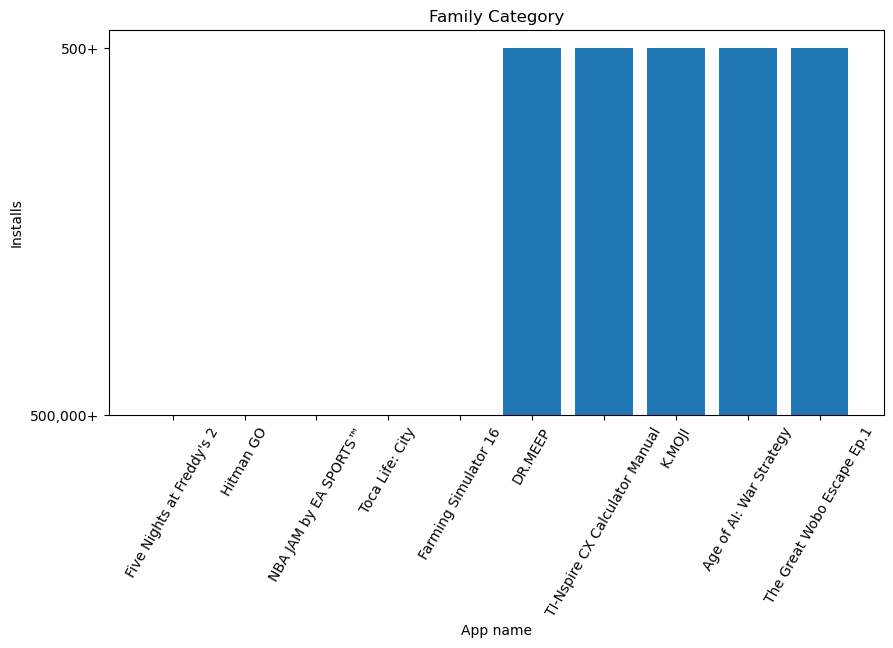

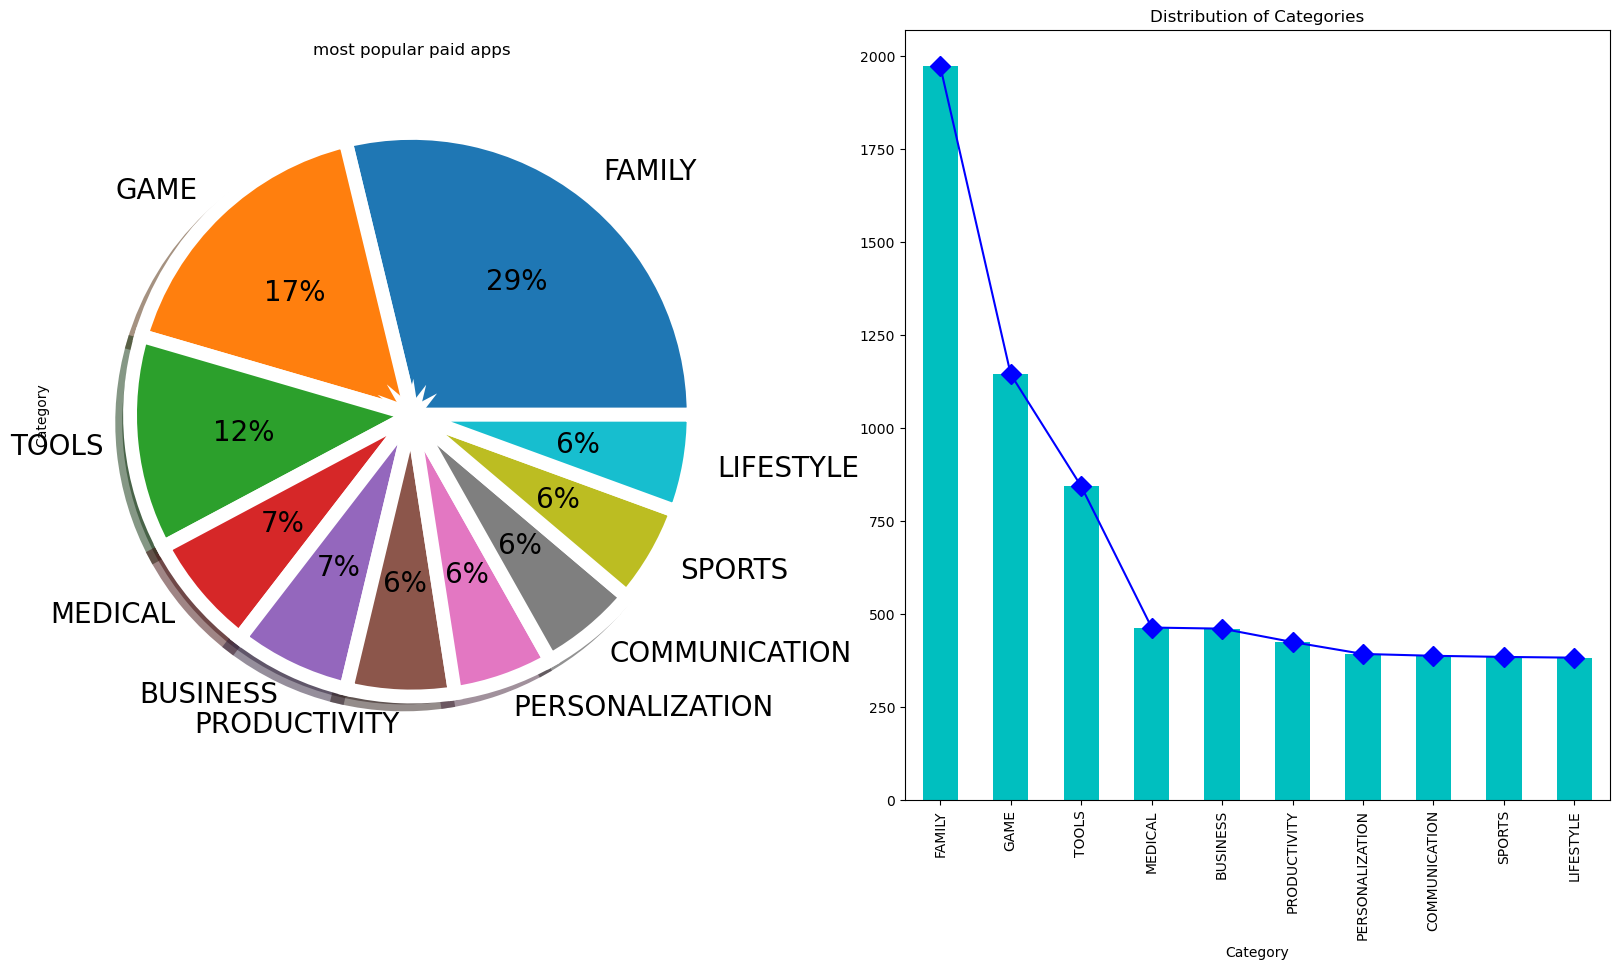

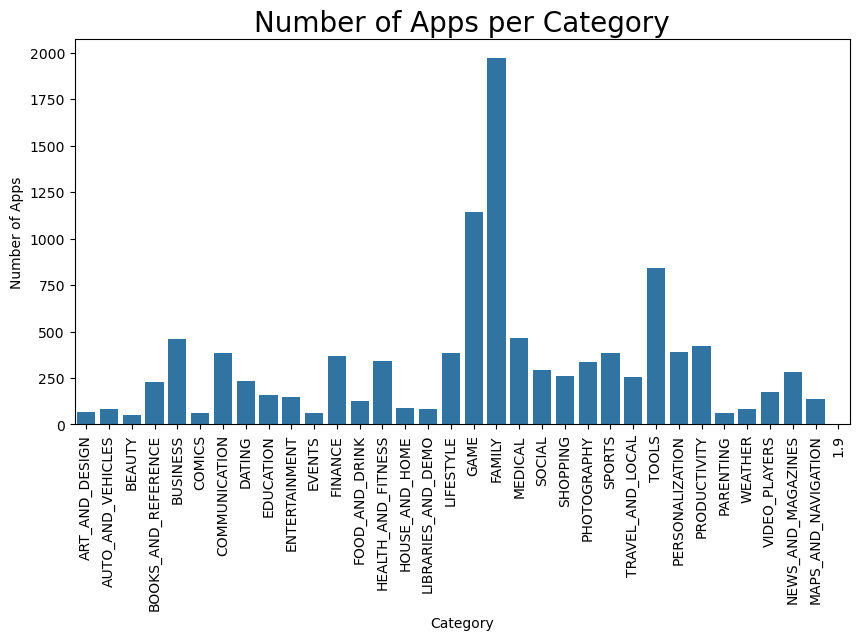

In [20]:
print_histograms(dataset)

In [21]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10,10))
    plt.style.use('classic')
    sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis', linewidth=0.5)
    plt.show()

In [22]:
def print_scatter_matrix():
    pd.plotting.scatter_matrix(dataset, alpha=0.9)
    plt.show()

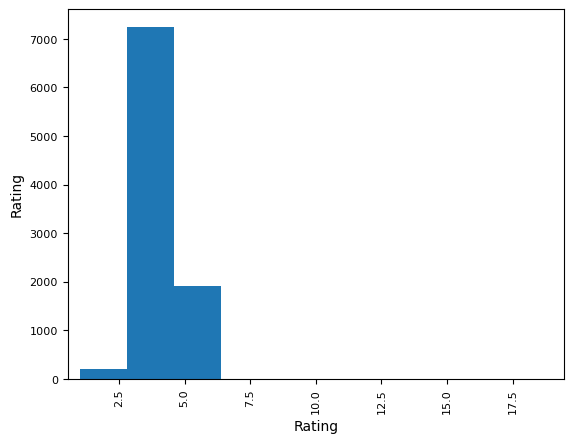

In [23]:
print_scatter_matrix()

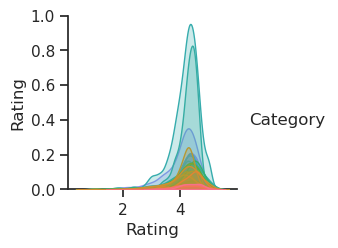

In [24]:
def print_scatter_matrix():
    apps_dataset = load_dataset()
    sns.set()
    sns.set_theme(style="ticks")
    sns.pairplot(apps_dataset, hue="Category")
    plt.show()


print_scatter_matrix()